In [2]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_auc_score

# NSS score predictions

In [3]:
def pivot_df(df):
    df = df[df["split"] == "test"]
    split = "test"
    model = df["model"].iloc[0]
    assert (df["model"] == model).all()
    preproc = df["preproc"].iloc[0]
    assert (df["preproc"] == preproc).all()
    label =  df["label"].iloc[0]
    assert (df["label"] == label).all()
    df = df.pivot(index="fold", columns="metric", values="value")
    df = df.rename_axis(None, axis=1)
    df = df.reset_index()
    df = df.rename(columns={"mae": "mean_absolute_error", "rmse": "root_mean_squarred_error"})
    df["set"] = split
    df["preproc"] = preproc
    df["model"] = model
    df["label"] = label
    return df

In [6]:
# Data Loading
path2models = "/neurospin/psy_sbox/analyses/2023_pauriau_EarlyBrainMarkersWithContrastiveAnalysis/models"
# VBM
df_vbm_ml = pd.read_csv(os.path.join(path2models, "vbm", "20241007_nss_stratification", f"preproc-vbm_model-lrl2_label-NSS.csv"), sep=",")
df_vbm_ml = pivot_df(df_vbm_ml)
df_vbm_ml["method"] = "vbm_sml"
"""
df_vbm_dl = pd.concat([pd.read_csv(os.path.join(path2models, "vbm", "20241007_dlmodel-vbm", f"dlmodel_fold-{fold}_epoch-99_test.csv")) for fold in range(10)] , axis=0)
df_vbm_dl["method"] = "vbm_dl"
df_vbm_dl["model"] = "resnet18"
df_vbm_dl["label"] = "NSS"
df_vbm_dl["preproc"] = "vbm"
"""
# Skeleton
"""
df_skel_ml = pd.read_csv(os.path.join(path2models, "skeleton", "20241007_nss_stratification", f"preproc-skeleton_model-lrl2_label-NSS.csv"), sep=",")
df_skel_ml = pivot_df(df_skel_ml)
df_skel_ml["method"] = "skeleton_sml"
"""
# Find the good experience
path_to_exp = "/neurospin/psy_sbox/analyses/2024_pauriau_global_vs_local/models/global/20250210_nss_prediction"
df_skel_tl = pd.concat([pd.read_csv(os.path.join(path_to_exp, f"classifier_fold-{fold}_epoch-99_test.csv")) for fold in range(10)], axis=0)
df_skel_tl["method"] = "skeleton_transfer_learning"
df_skel_tl["model"] = "densenet121"
df_skel_tl["label"] = "NSS"
df_skel_tl["preproc"] = "skeleton"
df_skel_tl = df_skel_tl.rename({"r2_score": "r2", "root_mean_squared_error": "root_mean_squarred_error"})


df_skel_dl = pd.concat([pd.read_csv(os.path.join(path2models, "skeleton", "20250331_densenet_nss", f"dlmodel_fold-{fold}_epoch-49_test.csv")) for fold in range(10)], axis=0)
df_skel_dl["method"] = "skeleton_dl"
df_skel_dl["model"] = "resnet18"
df_skel_dl["label"] = "NSS"
df_skel_dl["preproc"] = "skeleton"
# Freesurfer
df_area_ml = pd.read_csv(os.path.join(path2models, "freesurfer", "20241007_nss_stratification", f"texture-area_model-lrl2_label-NSS.csv"))
df_area_ml["model"] = "lrl2"
df_area_ml["preproc"] = "freesurfer"
df_area_ml = pivot_df(df_area_ml)
df_area_ml["method"] = "area"
df_curv_ml = pd.read_csv(os.path.join(path2models, "freesurfer", "20241007_nss_stratification", f"texture-curv_model-lrl2_label-NSS.csv"))
df_curv_ml["model"] = "lrl2"
df_curv_ml["preproc"] = "freesurfer"
df_curv_ml = pivot_df(df_curv_ml)
df_curv_ml["method"] = "curv"
df_thickness_ml = pd.read_csv(os.path.join(path2models, "freesurfer", "20241007_nss_stratification", f"texture-thickness_model-lrl2_label-NSS.csv"))
df_thickness_ml["model"] = "lrl2"
df_thickness_ml["preproc"] = "freesurfer"
df_thickness_ml = pivot_df(df_thickness_ml)
df_thickness_ml["method"] = "cortical_thickness"
df_nss_predictions = pd.concat((df_vbm_ml, df_skel_dl, df_skel_tl, df_area_ml, df_curv_ml, df_thickness_ml), axis=0, ignore_index=True)

In [7]:
df_nss_predictions[["method", "r2", "mean_absolute_error", "root_mean_squarred_error"]].groupby("method").describe(percentiles=[0.5])

r2                                          \
                           count      mean       std       min       50%   
method                                                                     
area                        10.0  0.008450  0.036739 -0.047854  0.007988   
cortical_thickness          10.0  0.022758  0.139067 -0.259287  0.058237   
curv                        10.0 -0.039154  0.101529 -0.200684 -0.041129   
skeleton_dl                 10.0 -0.019182  0.377384 -0.696290 -0.011393   
skeleton_transfer_learning   0.0       NaN       NaN       NaN       NaN   
vbm_sml                     10.0 -0.018861  0.133930 -0.281398  0.001170   

                                     mean_absolute_error                       \
                                 max               count       mean       std   
method                                                                          
area                        0.053896                10.0   5.836740  0.740087   
cortical_thickness          0.165499                10.0   5.685060  0.930336   
curv                        0.119133                10.0   5.976896  0.888063   
skeleton_dl                 0.495009                10.0   5.904009  1.438472   
skeleton_transfer_learning       NaN                20.0  10.217545  0.440798   
vbm_sml                     0.119689                10.0   5.863165  1.010283   

                                                            \
                                 min        50%        max   
method                                                       
area                        5.167892   5.603008   7.330269   
cortical_thickness          4.214799   5.553961   7.193073   
curv                        5.022553   5.856558   7.861896   
skeleton_dl                 3.828208   6.132461   7.933713   
skeleton_transfer_learning  9.333517  10.219316  11.277930   
vbm_sml                     4.417838   5.865971   7.619876   

                           root_mean_squarred_error                      \
                                              count      mean       std   
method                                                                    
area                                           10.0  7.351627  1.640685   
cortical_thickness                             10.0  7.269950  1.572012   
curv                                           10.0  7.526626  1.764300   
skeleton_dl                                    10.0  7.371269  2.190435   
skeleton_transfer_learning                      0.0       NaN       NaN   
vbm_sml                                        10.0  7.440953  1.717422   

                                                           
                                 min       50%        max  
method                                                     
area                        6.076128  6.639412  11.403646  
cortical_thickness          5.715591  6.803705  10.782977  
curv                        5.921340  6.798106  11.911862  
skeleton_dl                 4.647543  7.069439  10.793850  
skeleton_transfer_learning       NaN       NaN        NaN  
vbm_sml                     5.877786  6.953375  11.526318

## NSS random permutation predictions

In [9]:
saving_dir = "/neurospin/psy_sbox/analyses/2023_pauriau_EarlyBrainMarkersWithContrastiveAnalysis/models/vbm/20241007_nss_stratification"
preproc = "vbm"
n_permutations = 1000
label = "NSS"
results = pd.concat([pd.read_csv(os.path.join(saving_dir, f"preproc-{preproc}_model-lrl2_label-{label}_permutation-{i}.csv")) for i in range(1, n_permutations+1)], axis=0)
results["target"] = results["label"].apply(lambda l: "random" if l != "NSS_permutation-0" else "scores")
results.head()

,label,fold,split,model,scaler,preproc,metric,value,target
0,NSS_permutation-1,0,train,lrl2,True,vbm,r2,1.000000,random
1,NSS_permutation-1,0,train,lrl2,True,vbm,rmse,0.002100,random
2,NSS_permutation-1,0,train,lrl2,True,vbm,mae,0.001716,random
3,NSS_permutation-1,0,test,lrl2,True,vbm,r2,-0.502206,random
4,NSS_permutation-1,0,test,lrl2,True,vbm,rmse,13.745406,random


In [18]:
df = pd.read_csv(os.path.join(saving_dir, f"preproc-{preproc}_model-lrl2_label-{label}_permutation-0.csv"))

In [35]:
nb_folds = 10
pvalue = {"fold": [], "value": []}
for fold in range(nb_folds):
    score = df.loc[(df["fold"] == fold) & (df["split"]=="test") & (df["metric"] == "mae"), "value"].iloc[0]
    pvalue["fold"].append(fold)
    pvalue["value"].append(len(results[(results["value"] <= score) & (results["fold"] == fold) & (results["split"]=="test") & (results["metric"] == "mae")]))

In [37]:
np.mean(pvalue["value"])

447.3

In [38]:
np.std(pvalue["value"])

228.7881334335328

In [24]:
df.loc[(df["fold"] == 0) & (df["split"]=="test") & (df["metric"] == "mae"), "value"]

5    6.043295
Name: value, dtype: float64

# NSS predictions against diagnosis

In [10]:
nb_folds = 10
path_to_data = "/neurospin/psy_sbox/analyses/2023_pauriau_EarlyBrainMarkersWithContrastiveAnalysis/data"
path2models = "/neurospin/psy_sbox/analyses/2023_pauriau_EarlyBrainMarkersWithContrastiveAnalysis/models"
id_types = {"participant_id": str,
            "session": int,
            "acq": int,
            "run": int}
df = pd.read_csv(os.path.join(path_to_data, "processed", "ausz_t1mri_participants.csv"), dtype=id_types)
scheme = pd.read_csv(os.path.join(path_to_data, "schemes", "nss_stratified_10_fold_ausz.csv"), dtype=id_types)

assert (df["participant_id"] == scheme["participant_id"]).all()

for fold in range(nb_folds):

    y_pred = np.load(os.path.join(path2models, "skeleton", "20250331_densenet_nss", f"y_pred_fold-{fold}_epoch-49_test.npy"))
    y_true = np.load(os.path.join(path2models, "skeleton", "20250331_densenet_nss", f"y_true_fold-{fold}_epoch-49_test.npy"))
    # sanity check
    assert (df.loc[scheme[f"fold{fold}"] == "test", "NSS"].values == y_true).all()
    df.loc[scheme[f"fold{fold}"] == "test", "NSS_pred"] = y_pred

In [11]:
data = {"diagnosis": [], "r2": [], "mae": [], "rmse": []}
for diag in ("control", "scz", "scz-asd", "asd"):
    y_pred = df.loc[df["diagnosis"] == diag, "NSS_pred"].values
    y_true = df.loc[df["diagnosis"] == diag, "NSS"].values
    data["diagnosis"].append(diag)
    data["r2"].append(r2_score(y_true=y_true, y_pred=y_pred))
    data["mae"].append(mean_absolute_error(y_true=y_true, y_pred=y_pred))
    data["rmse"].append(mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False))
df_pred = pd.DataFrame(data)

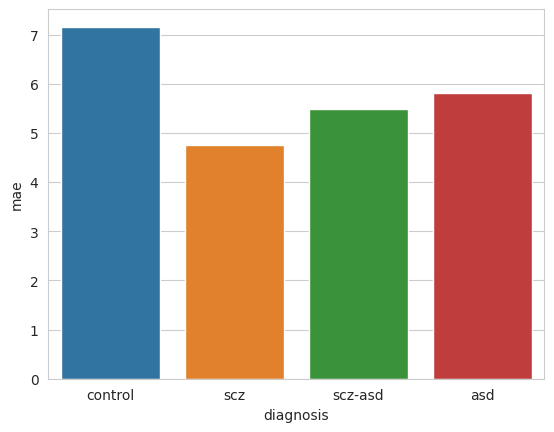

In [12]:
with sns.axes_style("whitegrid"):
    sns.barplot(data=df_pred, x="diagnosis", y="mae", hue="diagnosis")
plt.show()

In [13]:
bin_edges = np.histogram_bin_edges(df["NSS"].values, bins="auto")
# Discretizes the values according to these bins
df["NSS_bin"] = np.digitize(df["NSS"].values, bin_edges[1:], right=True)

In [14]:
len(df[(df["NSS_bin"] == 1) & (df["diagnosis"] == "control")])

8

In [15]:
data = {"bin": [], "edge": [], "N": [], "r2": [], "mae": [], "rmse": [], "control": [], "scz": [], "scz-asd": [], "asd": []}
for i, e in enumerate(bin_edges[1:]):
    y_pred = df.loc[df["NSS_bin"] == i, "NSS_pred"].values
    y_true = df.loc[df["NSS_bin"] == i, "NSS"].values
    data["bin"].append(i)
    data["N"].append(len(y_true))
    data["edge"].append(e)
    if len(y_pred) > 0:
        data["r2"].append(r2_score(y_true=y_true, y_pred=y_pred))
        data["mae"].append(mean_absolute_error(y_true=y_true, y_pred=y_pred))
        data["rmse"].append(mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False))
        data["control"].append(len(df[(df["NSS_bin"] == i) & (df["diagnosis"] == "control")]))
        data["scz"].append(len(df[(df["NSS_bin"] == i) & (df["diagnosis"] == "scz")]))
        data["scz-asd"].append(len(df[(df["NSS_bin"] == i) & (df["diagnosis"] == "scz-asd")]))
        data["asd"].append(len(df[(df["NSS_bin"] == i) & (df["diagnosis"] == "asd")]))
    else:
        data["r2"].append(0)
        data["mae"].append(0)
        data["rmse"].append(0)
        data["control"].append(0)
        data["scz"].append(0)
        data["scz-asd"].append(0)
        data["asd"].append(0)
df_pred_bin = pd.DataFrame(data)

/neurospin/dico/pauriau/envs/nss/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/neurospin/dico/pauriau/envs/nss/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [16]:
bin_edges

array([ 0. ,  4.1,  8.2, 12.3, 16.4, 20.5, 24.6, 28.7, 32.8, 36.9, 41. ])

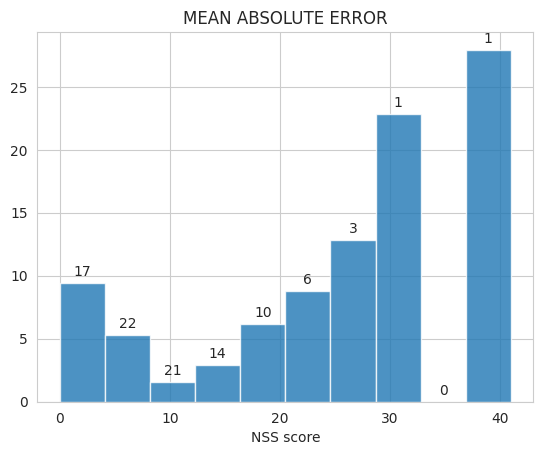

In [17]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 1)
    """
    bottom = np.zeros_like(bin_edges[1:])
    for diag in ("control", "scz", "scz-asd", "asd"):
        heights = df_pred_bin["mae"] * df_pred_bin[diag] / df_pred_bin["N"]
        rects = ax.bar(x=bin_edges[:-1], height=heights,
                       width=[bin_edges[i+1]-bin_edges[i] for i in range(len(bin_edges[1:]))], 
                       align="edge", bottom=bottom, label=diag)
        bottom += heights
    """
    rects = ax.bar(x=bin_edges[:-1], height=df_pred_bin["mae"],
                       width=[bin_edges[i+1]-bin_edges[i] for i in range(len(bin_edges[1:]))], 
                       align="edge", alpha=0.8)
    ax.bar_label(rects, labels=df_pred_bin["N"], padding=3)
    # ax.legend()
    ax.set_title("MEAN ABSOLUTE ERROR")
    ax.set_xlabel("NSS score")
plt.show()

In [83]:
df["skeleton_size"]

0     34236
1     38026
2     39690
3     35365
4     35981
      ...  
90    38706
91    37406
92    34217
93    33218
94    37787
Name: skeleton_size, Length: 95, dtype: int64

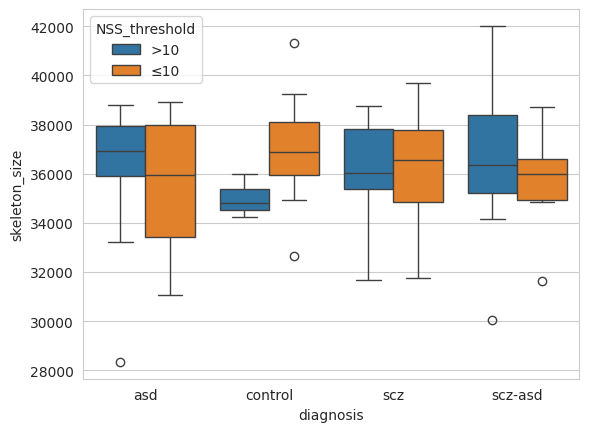

In [91]:
df.loc[df["NSS"] > 10, "NSS_threshold"] = ">10"
df.loc[df["NSS"] <= 10, "NSS_threshold"] = "\u226410"
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df, x="diagnosis", y="skeleton_size", hue="NSS_threshold")

# NSS thresholded classification

In [ ]:
path_to_exp = "/neurospin/psy_sbox/analyses/2023_pauriau_EarlyBrainMarkersWithContrastiveAnalysis/models/skeleton/20250210_dl_skeleton_nss_threshold"
epoch_f = 49
df_train = pd.concat([pd.read_csv(os.path.join(path_to_exp, f"dlmodel_fold-{fold}_epoch-{epoch_f}_train.csv")) for fold in range(10)], axis=0)
df_test = pd.concat([pd.read_csv(os.path.join(path_to_exp, f"dlmodel_fold-{fold}_epoch-{epoch_f}_test.csv")) for fold in range(10)], axis=0)

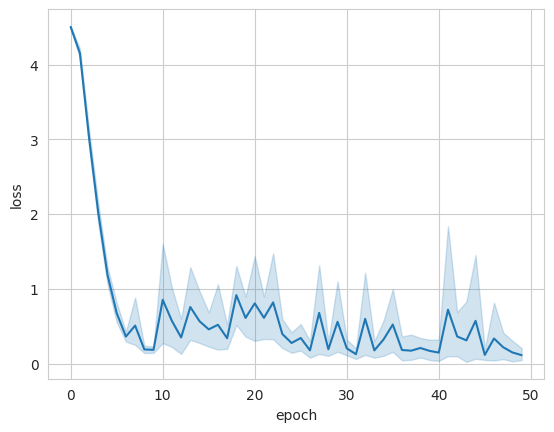

In [ ]:
with sns.axes_style("whitegrid"):
    sns.lineplot(data=df_train, x="epoch", y="loss")
plt.show()

In [ ]:
df_test

,fold,epoch,set,loss,roc_auc,balanced_accuracy,timestep
0,0,49,test,2.574018,0.600000,0.600000,1.739205e+09
0,1,49,test,4.410855,0.280000,0.300000,1.739207e+09
0,2,49,test,3.179512,0.375000,0.458333,1.739209e+09
0,3,49,test,2.594645,0.583333,0.541667,1.739210e+09
0,4,49,test,1.088687,0.760000,0.700000,1.739212e+09
0,5,49,test,1.882632,0.550000,0.650000,1.739214e+09
0,6,49,test,1.734568,0.600000,0.650000,1.739215e+09
0,7,49,test,5.719471,0.300000,0.325000,1.739217e+09
0,8,49,test,3.857040,0.350000,0.425000,1.739218e+09
0,9,49,test,1.088039,0.666667,0.500000,1.739220e+09


In [ ]:
df_test.describe()

,fold,epoch,loss,roc_auc,balanced_accuracy,timestep
count,10.00000,10.0,10.000000,10.000000,10.000000,1.000000e+01
mean,4.50000,49.0,2.812947,0.506500,0.515000,1.739213e+09
std,3.02765,0.0,1.502117,0.166975,0.138433,4.937827e+03
min,0.00000,49.0,1.088039,0.280000,0.300000,1.739205e+09
25%,2.25000,49.0,1.771584,0.356250,0.433333,1.739209e+09
50%,4.50000,49.0,2.584332,0.566667,0.520833,1.739213e+09
75%,6.75000,49.0,3.687658,0.600000,0.637500,1.739216e+09
max,9.00000,49.0,5.719471,0.760000,0.700000,1.739220e+09
